<a href="https://colab.research.google.com/github/debbiedebdeb/Algorithm/blob/master/%5Bkaggle%5D_Students'_Academic_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------


    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import os

In [9]:
# Colab Notebook에 Kaggle API 세팅하기
os.environ['KAGGLE_USERNAME'] = 'debbiekim'
os.environ['KAGGLE_KEY'] ='a8238eddcf1957422ed574f5bf5cdf5c'

# data 다운로드
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 2.45MB/s]
Archive:  xAPI-Edu-Data.zip
  inflating: xAPI-Edu-Data.csv       


In [121]:
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

## 데이터 컬럼 분석


In [122]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info() # nan값 없음 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


##수치형 데이터


In [123]:
# 숫자형 컬럼 찾기 
num_c = [col for col,type_ in zip(df.dtypes.index, df.dtypes) if type_ =='int64' ]
num_c

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

In [124]:
# histplot을 이용해 시각화하기
def histplot(df, col) : 
    sns.histplot(x = col, data = df, hue='Class', hue_order = ['L','M','H'], kde = True)
    plt.show()

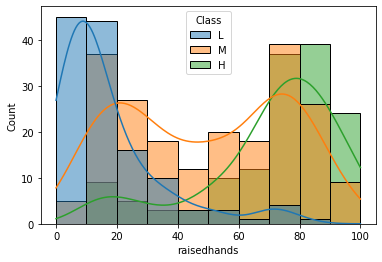

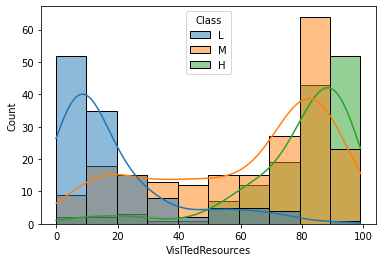

In [125]:
histplot(df,'raisedhands' )
histplot(df,'VisITedResources' )

# > 손을 많이들수록 성적이 좋은듯하다 
# > 손을 적게들수록 성적이 안좋은 경향이 있다 

# >> visitdresources : how many times the student visits a course content
# >> 손을 많이 든것보다 이 데이터에서 양극화가 뚜렷하다 
# >> 강의를 덜 들을수록 점수가 낮고 많이 들을 수록 더 높아 

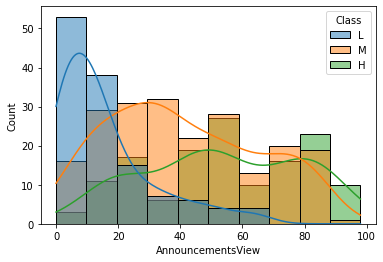

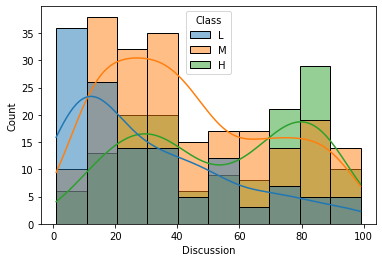

In [126]:
histplot(df,'AnnouncementsView' )
histplot(df,'Discussion' )

# > AnnouncementsView : how many times the student checks the new announcements
# > 공지 확인했는지 데이터 
# > 공지 확인 안한애들 중 점수가 안좋은 애들이 많지만, 성적이 좋은애들이라고 공지를 많이 읽은건 아니다? 


# >> Discussion : how many times the student participate on discussion groups 
# >> 토론을 얼마나 참여했는지 정도 
# >> 토론을 덜한애들 중 점수가 안좋은 애들이 있긴하지만, 토론 많이 한다고 좋은 성적을 얻는건 아니네?
# ++ M인 애들도 많음 

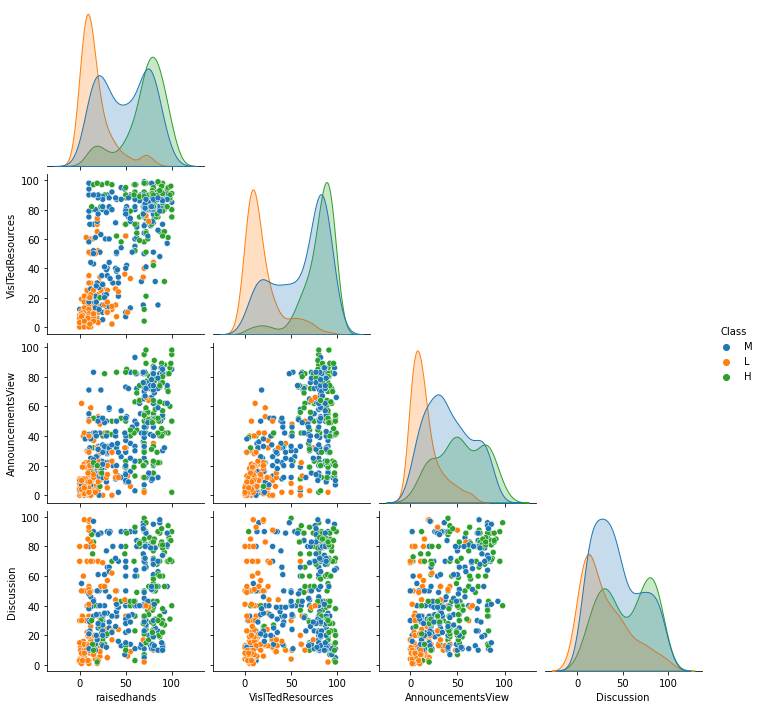

In [127]:
# pairplot을 이용해 feature간 상관성 확인해보기
sns.pairplot(df, corner = True, hue = 'Class')
plt.show()

## 범주형 데이터 

In [128]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [129]:
cat_cols = [idx for idx, type_ in zip(df.dtypes.index, df.dtypes) if type_== 'object']
cat_cols

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [130]:
list(set(df.columns) - set(num_c))

['StudentAbsenceDays',
 'Semester',
 'Topic',
 'ParentAnsweringSurvey',
 'NationalITy',
 'Relation',
 'ParentschoolSatisfaction',
 'gender',
 'GradeID',
 'SectionID',
 'StageID',
 'Class',
 'PlaceofBirth']

In [131]:
# countplot을 이용해 EDA

def cp(df, col) : 
    if len(df[col].unique()) >= 7 : #카테고리가 7개 이상이면
        plt.subplots( figsize = (10,8)) 
        sns.countplot(y = col, data= df, hue='Class',hue_order = ['L','M','H'] )
    else : 
        sns.countplot(x = col, data= df, hue='Class',hue_order = ['L','M','H'] )
    plt.show()



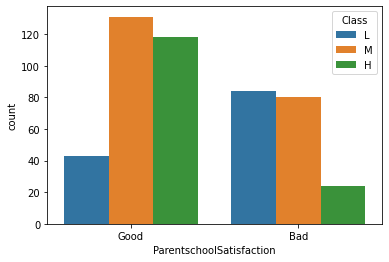

In [132]:
cp(df,'ParentschoolSatisfaction')

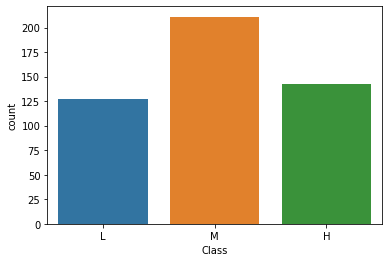

In [133]:
sns.countplot(x = 'Class', data = df, order = ['L', 'M', 'H'])

## 전처리 후 시각화(plt)

In [134]:
# L, M, H를 라벨링 (eg. L: -1, M: 0, H:1)
df['Class_value'] = df['Class'].map(dict(L=-1, M = 0, H = 1))
df.head(2)



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0


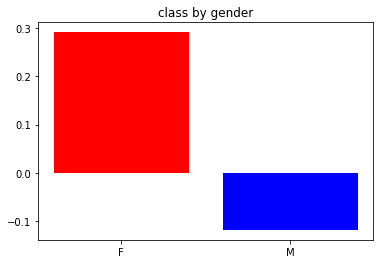

In [135]:
# 성별별 Class 점수를 확인
gb = df.groupby('gender').mean()['Class_value']
gb
plt.bar(gb.index, gb, color = ['red','blue'] )
plt.title('class by gender')
plt.show()

In [136]:
len(gb)

2

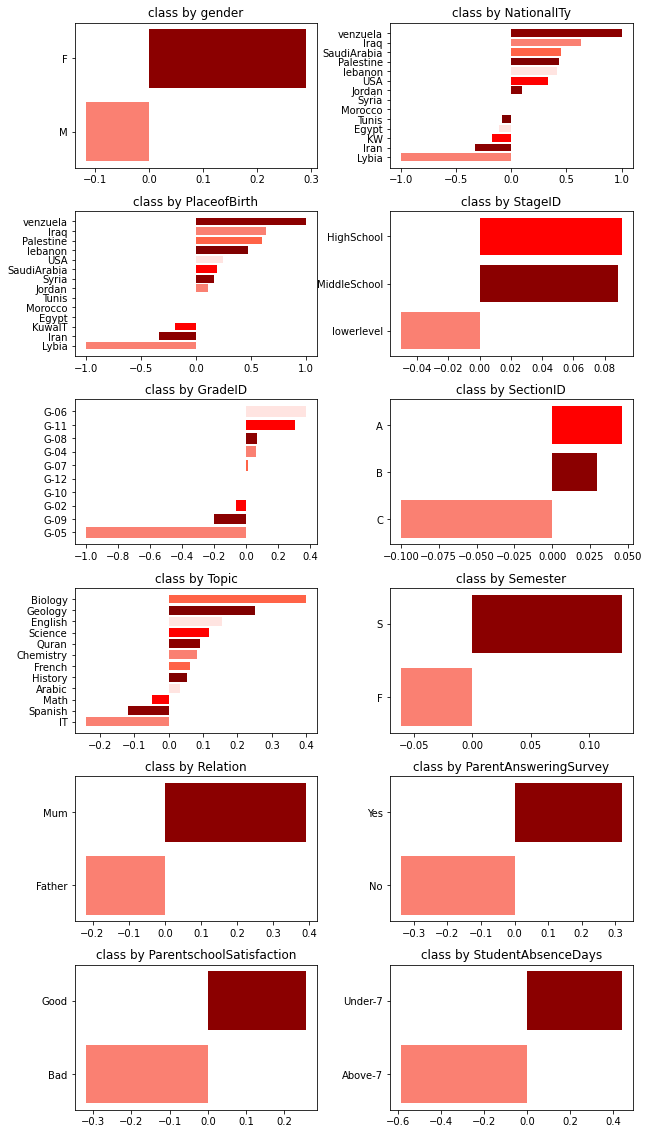

In [137]:
colors = ['salmon','darkred','red','mistyrose','maroon','tomato'] ## 색상 지정 
def gb(df, col) : 
    gb = df.groupby(col).mean()['Class_value'].sort_values()
    return gb

fig, axs = plt.subplots(6,2, figsize = (10,20)) # 12개의 ax를 가진 figure 생성
for i,c in enumerate(cat_cols[:-1]) : 
    n = i//2
    m = i%2
    gbr = gb(df,c)
    axs[n,m].set_title(f'class by {c}')
    axs[n,m].barh(gbr.index, gbr, color = colors)

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

# 모델링을 위한 데이터 전처리


In [151]:
cat_cols

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [146]:
df1 = df.copy()

In [197]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity(다중공선성)를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df1, columns = ['gender',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'StudentAbsenceDays'] , drop_first = True)
y = df1['Class']

X.drop(columns = ['Class', 'Class_value', 'ParentschoolSatisfaction','NationalITy',], axis = 1, inplace = True) #Class는 삭제 

## 모델링


```
* ParentschoolSatisfaction 뺀 값 비교 
* NationalITy 뺀 값 비교 
  * 첫시도 : 다 넣음
  * 2번째 : ps 빼기 
  * 3번째 시도 : 위 시도에서 좋은 결과인조건에서 nationalty 포함해서 결과값내기 
  * 4번째 : 빼보기 
```

In [198]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, 
                                          random_state = 42)

### Logistic Regression 모델


In [199]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter = 10000)
model_lr = model_lr.fit(X_tr, y_tr)
pred = model_lr.predict(X_te) #test set으로 예측하기 

In [200]:
# 결과 확인하기 
from sklearn.metrics import classification_report

print(classification_report(y_te, pred))

              precision    recall  f1-score   support

           H       0.78      0.64      0.70        22
           L       0.79      0.88      0.84        26
           M       0.78      0.79      0.78        48

    accuracy                           0.78        96
   macro avg       0.78      0.77      0.77        96
weighted avg       0.78      0.78      0.78        96



Precision : H라고 예측한 애들중 진짜 H받은 비율  
Recall : H애들 중 H받을거라고 예측한 비율

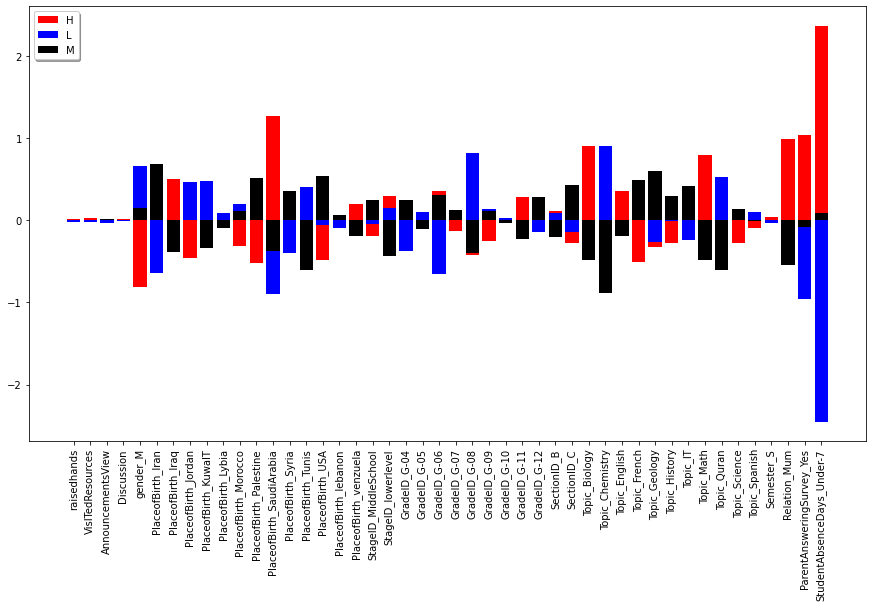

In [201]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
# 어떤 feature가 예측하는데 가장 영향을 많이 끼쳤을까? 

model_lr.coef_.shape # class 3개의 회귀계수 
model_lr.classes_ 

fig  = plt.figure(figsize = (15,8))
plt.bar(X.columns, model_lr.coef_[0,:], label ='H' , color = 'red')
plt.bar(X.columns, model_lr.coef_[1,:], label ='L', color = 'blue' )
plt.bar(X.columns, model_lr.coef_[2,:], label ='M' , color = 'black')
plt.xticks(rotation = 90)
plt.legend(shadow = True)

plt.show()

##XGBoost 모델 생성


In [202]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_te)
print(classification_report(y_te, pred))

              precision    recall  f1-score   support

           H       0.84      0.73      0.78        22
           L       0.86      0.92      0.89        26
           M       0.84      0.85      0.85        48

    accuracy                           0.84        96
   macro avg       0.85      0.83      0.84        96
weighted avg       0.84      0.84      0.84        96



> XGB가 성능이 더 좋음
 * L로 예측한게 맞출 확률이 더 높음



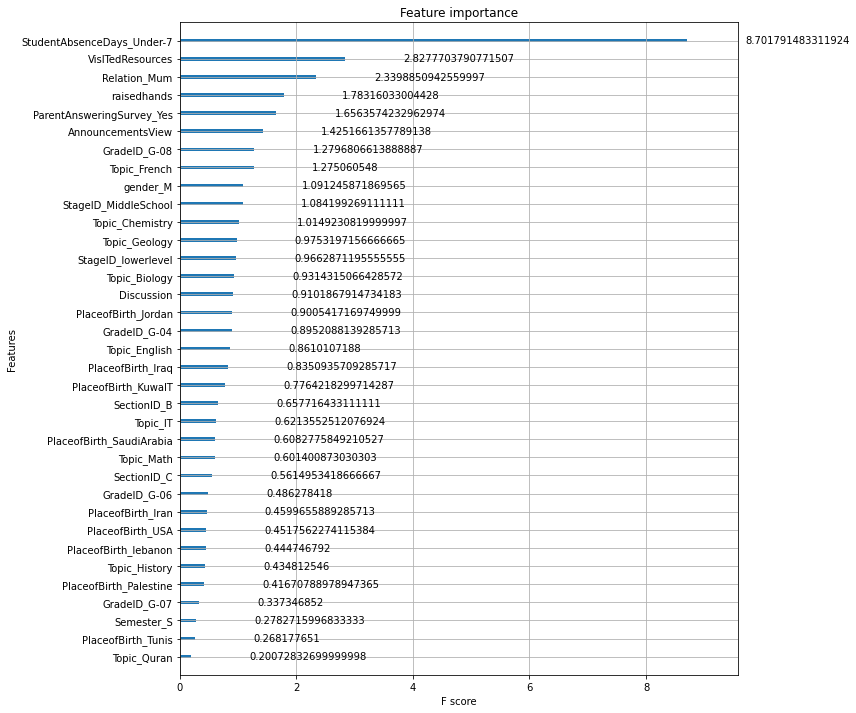

In [203]:
from xgboost.plotting import plot_importance
# XGBoost 모델의 feature_importances_ 속성을 plot하기

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb, ax =ax, importance_type = 'gain')
#plot_importance(xgb, ax =ax, importance_type = 'cover')

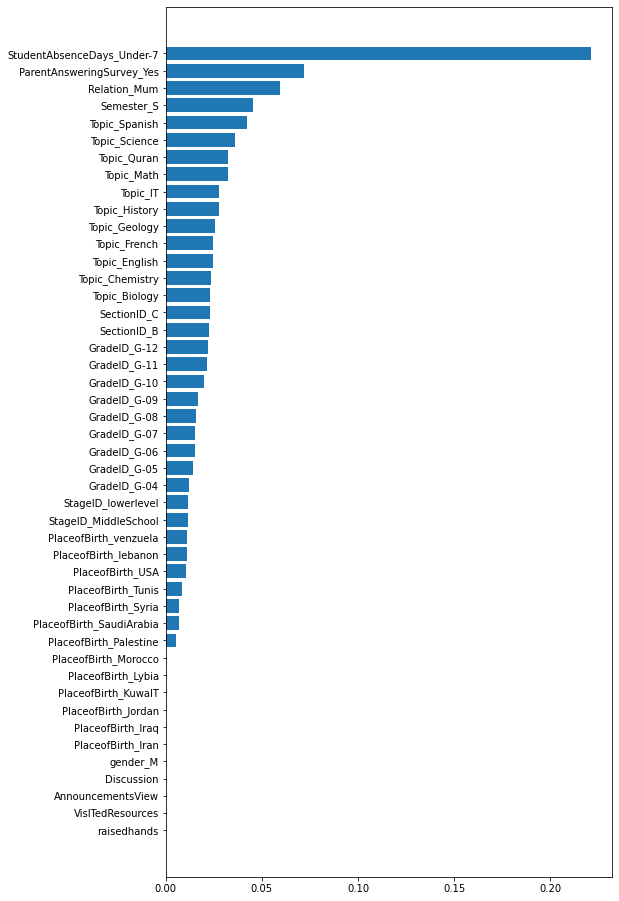

In [204]:
plt.figure(figsize = (8,16))
plt.barh(X.columns, sorted(xgb.feature_importances_))
plt.show()


### shap  (SHapley Additive exPlanations) 

In [205]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


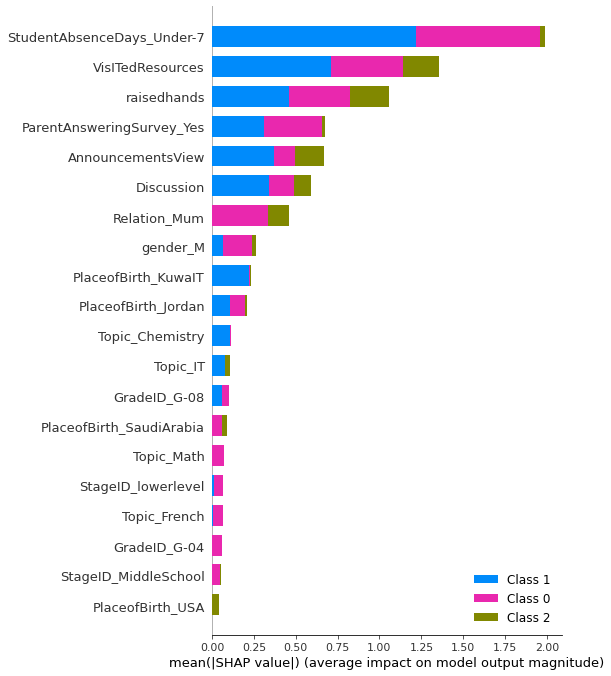

In [206]:

import shap
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgb) #xgb model shap value 확인 객체 지정 
shap_values = explainer.shap_values(X_te) #shap values 계산 

# 모든 feature의 shap value를 요약한것
shap.summary_plot(shap_values, X_te)